# (04) Dan notebook

**Motivation**: Load data, explore HyperFlow. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-MTMST/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-MTMST/figs')
tmp_dir = os.path.join(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_MTMST'))
from analysis.opticflow import *
from figures.fighelper import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

## Load data

We will work with one of the experiments: ```expt='clu040'```

In [2]:
file = '/home/hadi/Documents/MTMST/data/ALL_tres25.h5'
file = h5py.File(file, 'r')

expt = 'clu040'
group = file['YUWEI'][expt]
print(list(group))

['badspks', 'hf_center', 'hf_params', 'hf_radius', 'hf_radius_ratio', 'lfp', 'spks']

## Create stimulus form 8 hyperflow params

### Plot ```params``` & ```center``` distributions

In [3]:
params = np.array(group['hf_params'])
center = np.array(group['hf_center'])

params.shape, center.shape

((38400, 6), (38400, 2))

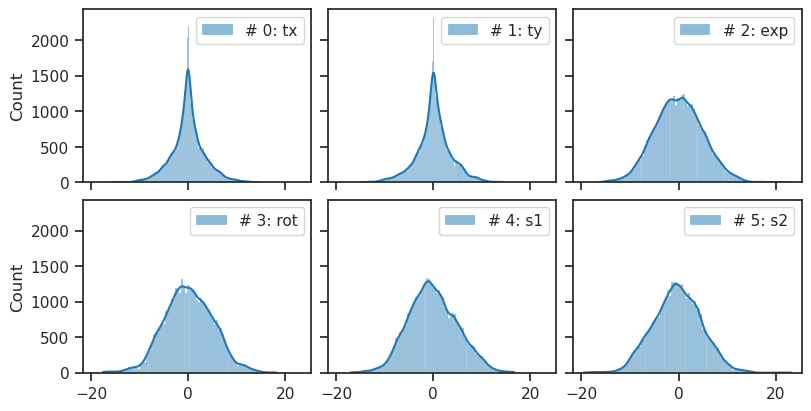

In [4]:
params_dict = {
    0: 'tx',
    1: 'ty',
    2: 'exp',
    3: 'rot',
    4: 's1',
    5: 's2',
}
fig, axes = create_figure(2, 3, (8, 4), 'all', 'all', layout='constrained')
for i in range(6):
    ax = axes.flat[i]
    sns.histplot(params[:, i], kde=True, label=f"# {i}: {params_dict[i]}", ax=ax)
    ax.legend()
plt.show()

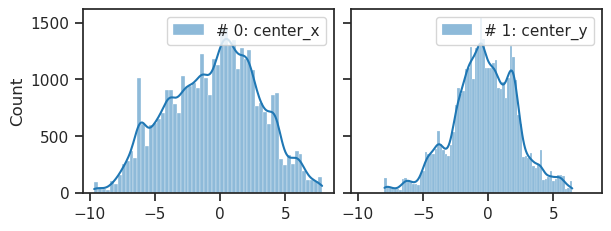

In [5]:
center_dict = {
    0: 'center_x',
    1: 'center_y',
}
fig, axes = create_figure(1, 2, (6, 2.2), 'all', 'all', layout='constrained')
for i in range(2):
    ax = axes.flat[i]
    sns.histplot(center[:, i], kde=True, label=f"# {i}: {center_dict[i]}", ax=ax)
    ax.legend()
plt.show()

### Let's take a look at radius

In [6]:
radius = np.array(group['hf_radius'])
r_ratio = np.array(group['hf_radius_ratio'])

np.unique(radius), np.unique(r_ratio)

(array([5.]), array([0.16666667]))

In [7]:
DESIGNSZ = 30
np.unique(r_ratio).item() * DESIGNSZ

5.0

## Close file

In [8]:
file.close()

## Generate stim frames

###  ```dim = 17```

In [9]:
hf_kws = {
    'dim': 17,
    'sres': 1,
}
hf = HyperFlow(
    params=params,
    center=center,
    r_ratio=r_ratio,
    **hf_kws,
)
stim = hf.compute_hyperflow()
print(f"stim shape: {stim.shape}")

stim shape: (38400, 2, 17, 17)

#### Show a few frames from the stimulus

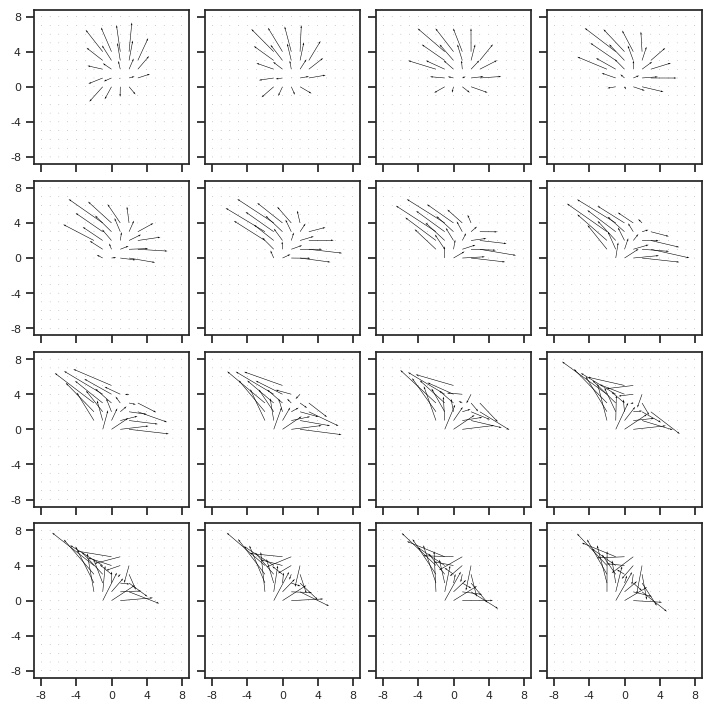

In [10]:
show_opticflow(stim[527:], scale=100);

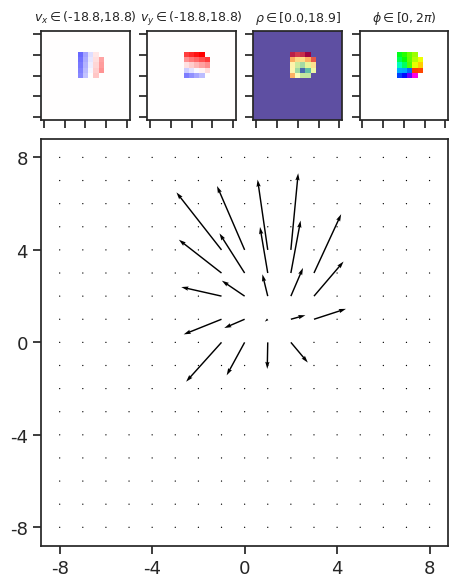

In [11]:
show_opticflow_full(stim[527], scale=100);

#### plot avg norm

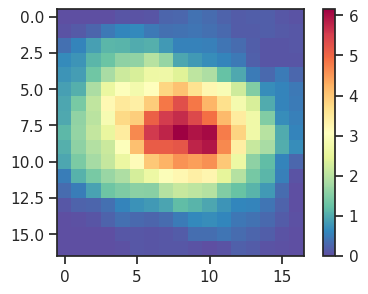

In [12]:
norm = sp_lin.norm(stim, axis=1).mean(0)
plt.imshow(norm, cmap='Spectral_r')
plt.colorbar()
plt.show()

###  ```dim = 25```

In [13]:
hf_kws = {
    'dim': 25,
    'sres': 1,
}
hf = HyperFlow(
    params=params,
    center=center,
    r_ratio=r_ratio,
    **hf_kws,
)
stim = hf.compute_hyperflow()
print(f"stim shape: {stim.shape}")

stim shape: (38400, 2, 25, 25)

#### Show a few frames from the stimulus

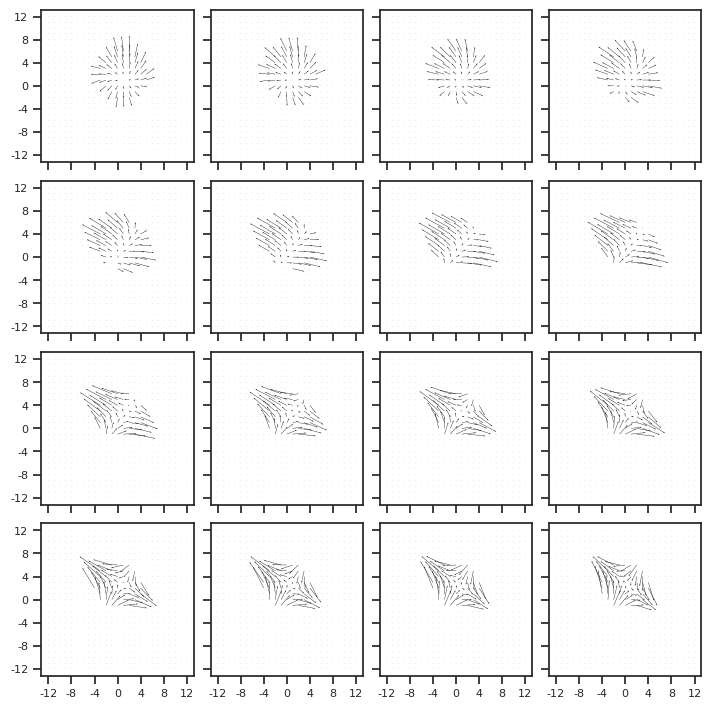

In [14]:
show_opticflow(stim[527:], scale=300);

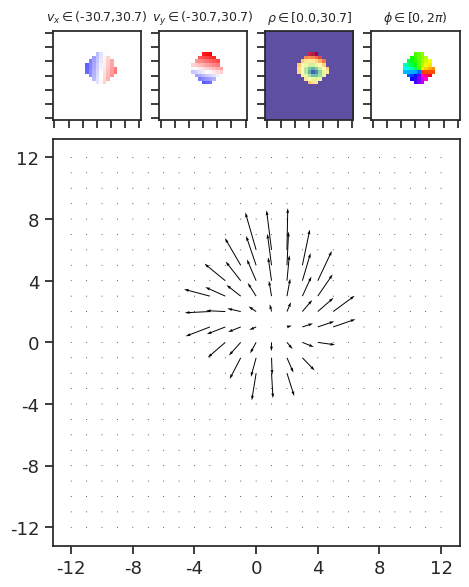

In [15]:
show_opticflow_full(stim[527], scale=300);

#### plot avg norm

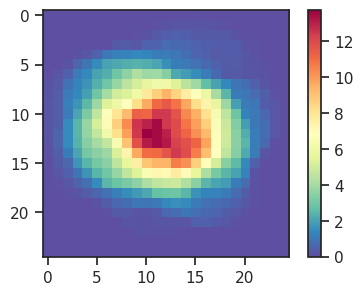

In [16]:
norm = sp_lin.norm(stim, axis=1).mean(0)
plt.imshow(norm, cmap='Spectral_r')
plt.colorbar()
plt.show()

###  ```dim = 50```

In [17]:
hf_kws = {
    'dim': 50,
    'sres': 1,
}
hf = HyperFlow(
    params=params,
    center=center,
    r_ratio=r_ratio,
    **hf_kws,
)
stim = hf.compute_hyperflow()
print(f"stim shape: {stim.shape}")

stim shape: (38400, 2, 50, 50)

#### Show a few frames from the stimulus

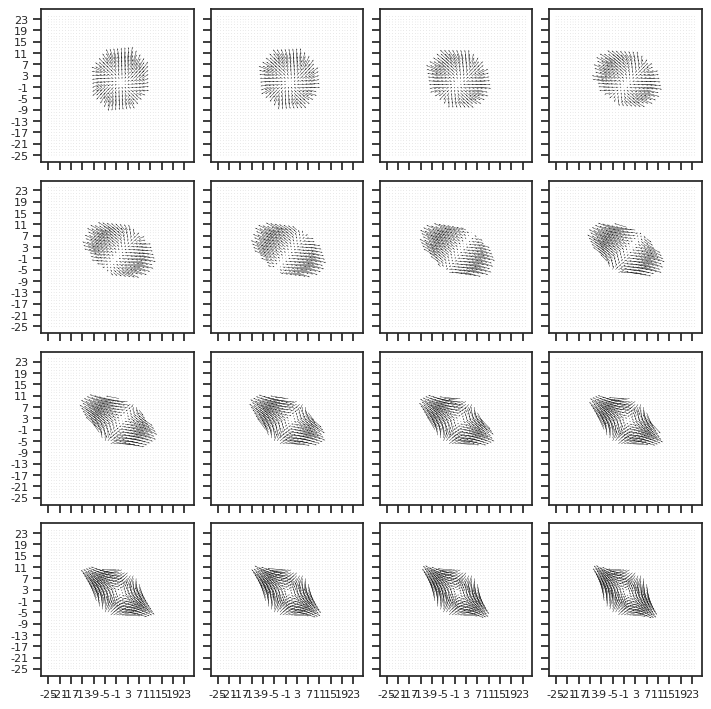

In [18]:
show_opticflow(stim[527:], scale=700);

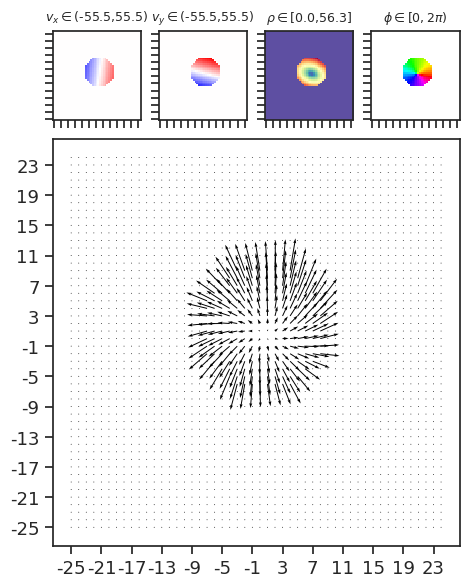

In [19]:
show_opticflow_full(stim[527], scale=700);

#### plot avg norm

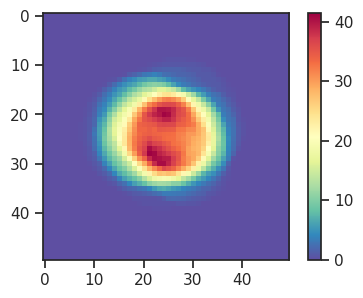

In [20]:
norm = sp_lin.norm(stim, axis=1).mean(0)
plt.imshow(norm, cmap='Spectral_r')
plt.colorbar()
plt.show()

###  ```dim = 30, sres = 2```

In [21]:
hf_kws = {
    'dim': 30,
    'sres': 2,
}
hf = HyperFlow(
    params=params,
    center=center,
    r_ratio=r_ratio,
    **hf_kws,
)
stim = hf.compute_hyperflow()
print(f"stim shape: {stim.shape}")

stim shape: (38400, 2, 15, 15)

#### Show a few frames from the stimulus

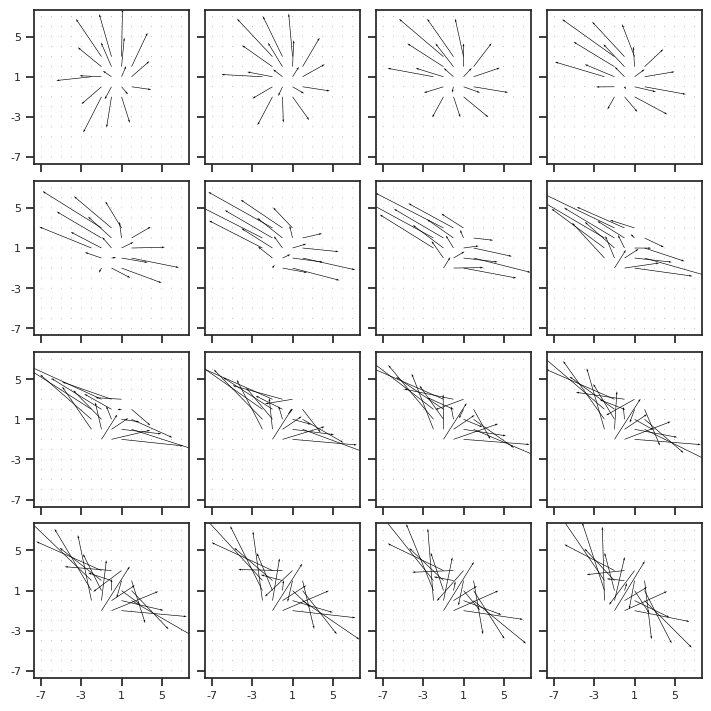

In [22]:
show_opticflow(stim[527:], scale=100);

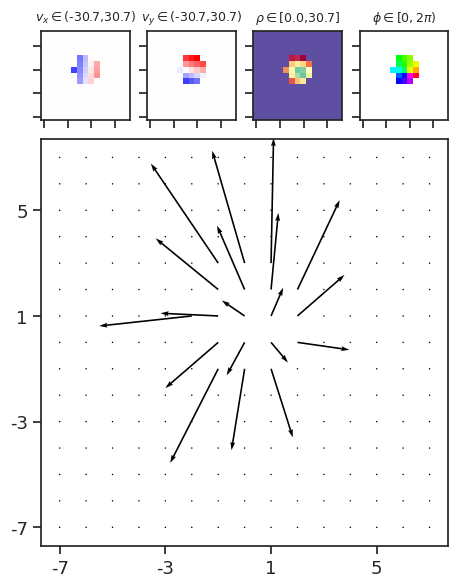

In [23]:
show_opticflow_full(stim[527], scale=100);

#### plot avg norm

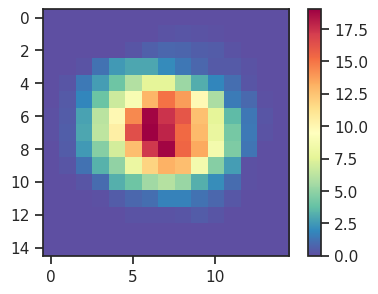

In [24]:
norm = sp_lin.norm(stim, axis=1).mean(0)
plt.imshow(norm, cmap='Spectral_r')
plt.colorbar()
plt.show()

###  ```dim = 15, sres = 1```

In [25]:
hf_kws = {
    'dim': 15,
    'sres': 1,
}
hf = HyperFlow(
    params=params,
    center=center,
    r_ratio=r_ratio,
    **hf_kws,
)
stim = hf.compute_hyperflow()
print(f"stim shape: {stim.shape}")

stim shape: (38400, 2, 15, 15)

#### Show a few frames from the stimulus

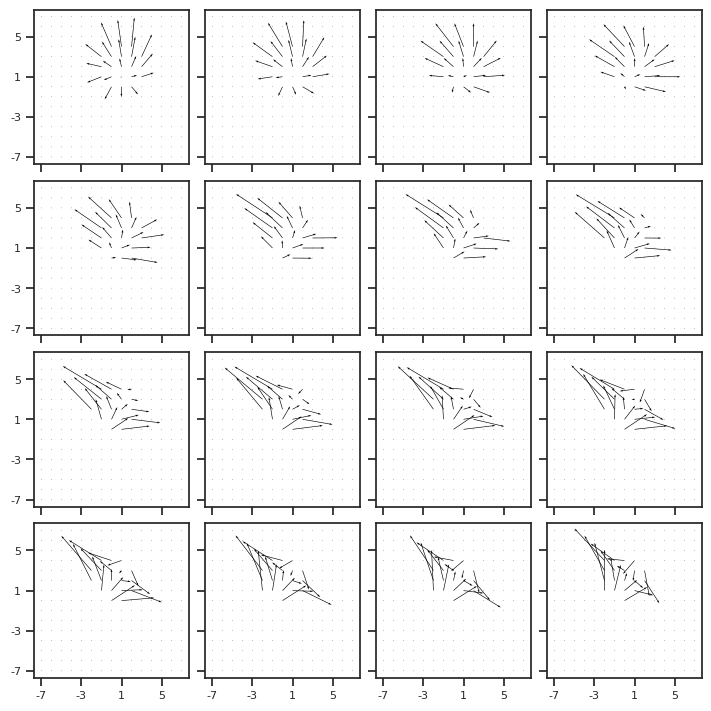

In [26]:
show_opticflow(stim[527:], scale=100);

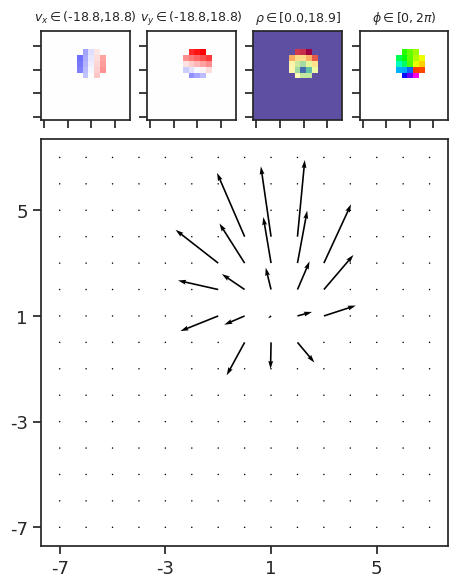

In [27]:
show_opticflow_full(stim[527], scale=100);

#### plot avg norm

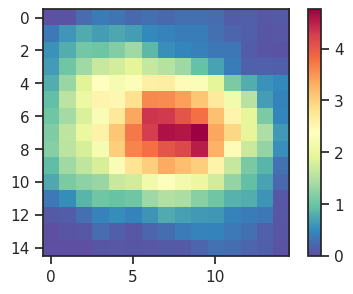

In [28]:
norm = sp_lin.norm(stim, axis=1).mean(0)
plt.imshow(norm, cmap='Spectral_r')
plt.colorbar()
plt.show()

## Debug

### 30 / 2

In [29]:
hf_kws = {
    'dim': 30,
    'sres': 2,
}
self = HyperFlow(
    params=params,
    center=center,
    r_ratio=r_ratio,
    **hf_kws,
)
stim = self.compute_hyperflow()

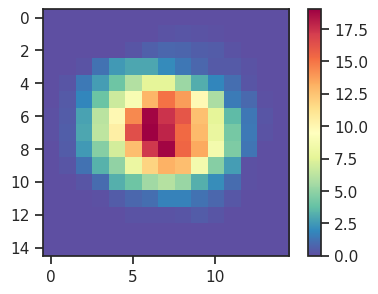

In [30]:
norm = sp_lin.norm(stim, axis=1).mean(0)
plt.imshow(norm, cmap='Spectral_r')
plt.colorbar()
plt.show()

In [32]:
xl, yl = self.dim
xl = int(np.round(xl / self.sres))
yl = int(np.round(yl / self.sres))
xl, yl

(15, 15)

In [33]:
xi0 = np.linspace(
    start=-xl / 2 + 0.5,
    stop=xl / 2 - 0.5,
    num=xl,
)

In [34]:
xi0

array([-7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
        6.,  7.])

In [35]:
xi0 * self.sres

array([-14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,
         8.,  10.,  12.,  14.])

In [39]:
xl, yl = self.dim
xl = int(np.round(xl / self.sres))
yl = int(np.round(yl / self.sres))

xi0 = np.linspace(
    start=-xl / 2 + 0.5,
    stop=xl / 2 - 0.5,
    num=xl,
) * self.sres
yi0 = np.linspace(
    start=-yl / 2 + 0.5,
    stop=yl / 2 - 0.5,
    num=yl,
) * self.sres
xi0, yi0 = np.meshgrid(xi0, yi0)

xi0.shape, yi0.shape

((15, 15), (15, 15))

In [46]:
np.min(xi0), np.max(xi0), np.min(yi0), np.max(yi0)

(-14.0, 14.0, -14.0, 14.0)

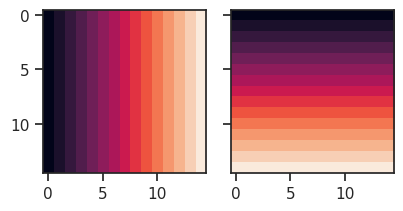

In [44]:
fig, axes = create_figure(1, 2, (4, 2), 'all', 'all', 'constrained')
axes[0].imshow(xi0)
axes[1].imshow(yi0)
plt.show()

### 15 / 1

In [47]:
hf_kws = {
    'dim': 15,
    'sres': 1,
}
self = HyperFlow(
    params=params,
    center=center,
    r_ratio=r_ratio,
    **hf_kws,
)
stim = self.compute_hyperflow()

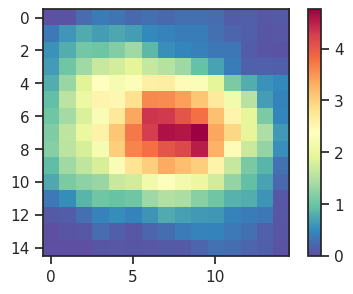

In [48]:
norm = sp_lin.norm(stim, axis=1).mean(0)
plt.imshow(norm, cmap='Spectral_r')
plt.colorbar()
plt.show()

In [49]:
xl, yl = self.dim
xl = int(np.round(xl / self.sres))
yl = int(np.round(yl / self.sres))
xl, yl

(15, 15)

In [50]:
xi0 = np.linspace(
    start=-xl / 2 + 0.5,
    stop=xl / 2 - 0.5,
    num=xl,
)

In [51]:
xi0

array([-7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
        6.,  7.])

In [52]:
xi0 * self.sres

array([-7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
        6.,  7.])

In [53]:
xl, yl = self.dim
xl = int(np.round(xl / self.sres))
yl = int(np.round(yl / self.sres))

xi0 = np.linspace(
    start=-xl / 2 + 0.5,
    stop=xl / 2 - 0.5,
    num=xl,
) * self.sres
yi0 = np.linspace(
    start=-yl / 2 + 0.5,
    stop=yl / 2 - 0.5,
    num=yl,
) * self.sres
xi0, yi0 = np.meshgrid(xi0, yi0)

xi0.shape, yi0.shape

((15, 15), (15, 15))

In [54]:
np.min(xi0), np.max(xi0), np.min(yi0), np.max(yi0)

(-7.0, 7.0, -7.0, 7.0)

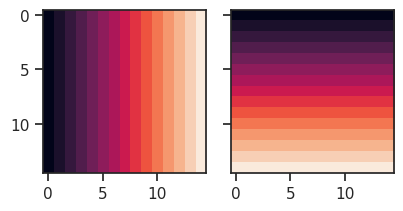

In [55]:
fig, axes = create_figure(1, 2, (4, 2), 'all', 'all', 'constrained')
axes[0].imshow(xi0)
axes[1].imshow(yi0)
plt.show()